In [278]:
import numpy as np
import matplotlib.pyplot as plt

**1. a)**

In [281]:
def func(x,y):
    if (x-2)**2 + y**2 <= 4 and x**2 + (y-2)**2 <= 4:
        return abs(x)**(2/3)
    else:
        return 0
    
def MonteCarlo(N):    
    # Generate N random variables from U(0,1)
    y = np.random.uniform(0,1,N)
    z = np.random.uniform(0,1,N)

    i_N = 0
    for i in range(N):
        i_N += func(2*y[i],2*z[i])
    i_N = i_N * 4 / N

    return i_N

In [283]:
N=1000
print(MonteCarlo(N))

2.2546498666028745


**1.c)**

In [233]:
def MonteCarloPlot():
    K = [2,3,4,5,6]
    realizations = np.zeros((5,5))
    for k in range(len(K)):
        for j in range(5):
            N = 10 ** K[k]
            realizations[k][j] = MonteCarlo(N)
            
    for k in range(len(K)):
        plt.scatter([K[k]]*5, realizations[k], color='blue', marker=(5,1), label=f'K={K[k]}' if k == 0 else "")  # Scatter each set
    plt.xlabel('K')
    plt.ylabel('Montecarlo approximation')
    plt.title('Monte Carlo Simulation Results')
    plt.show()

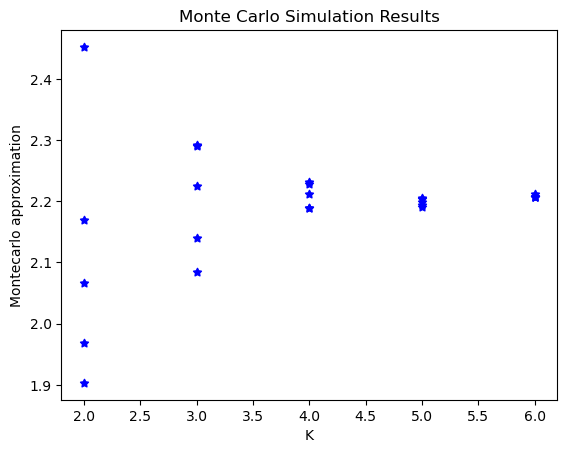

In [235]:
MonteCarloPlot()

We can appreciate that, as N increases, the integral montecarlo approximation converges to a value around 2.20.

**2.**

In [5]:
def StandardBrownianMotion(t):
    n = len(t)
    t_copy = t.copy()

    # Save the original indices
    original_indices = np.argsort(t)

    # Order the path in order to construct it mantaining brownian motion conditions
    t.sort()

    # Generate n random variables that will represent the increments
    # The increments are normally distributed with mean 0 and variance (t_j-t_i), with j=i+1
    increments = np.zeros(n)
    increments[0] = np.random.normal()*np.sqrt(t[0])
    for i in range(1, n):
        increments[i] = np.random.normal()*np.sqrt(t[i]-t[i-1])

    ordered_path = np.zeros(n)
    ordered_path[0] = increments[0]
    for i in range(1,n):
        ordered_path[i] = ordered_path[i-1]+increments[i]

    unordered_path = np.zeros(n)
    for i in range(n):
        unordered_path[i] = ordered_path[original_indices[i]]

    return unordered_path
    

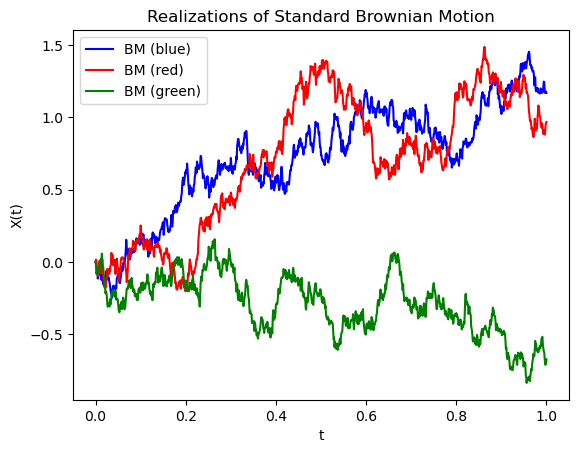

In [7]:
np.random.seed(1)

N = 10**3
preimage = np.linspace(0, 1, N + 1)

# Generate and plot realizations of the standard Brownian motion
X = StandardBrownianMotion(preimage)
plt.plot(preimage, X, 'b', label='BM (blue)')
plt.hold = True

X = StandardBrownianMotion(preimage)
plt.plot(preimage, X, 'r', label='BM (red)')

X = StandardBrownianMotion(preimage)
plt.plot(preimage, X, 'g', label='BM (green)')

plt.xlabel('t')
plt.ylabel('X(t)')
plt.title('Realizations of Standard Brownian Motion')
plt.legend()
plt.show()

**3.a)**

In [285]:
def BrownianMotion(T,N):
    time_steps = np.linspace(0, T, N)
    return StandardBrownianMotion(time_steps)

In [287]:
def BrownianMotionPlot():
    N = 1000
    for i in range(5):
        time = np.linspace(0, 1, N)
        BM = BrownianMotion(1,N)
        plt.plot(time, BM, label=f'BM{i+1}')
    plt.xlabel('time')
    plt.ylabel('W(t)')
    plt.title('5 Realizations of Brownian Motion')
    plt.legend()
    plt.show()

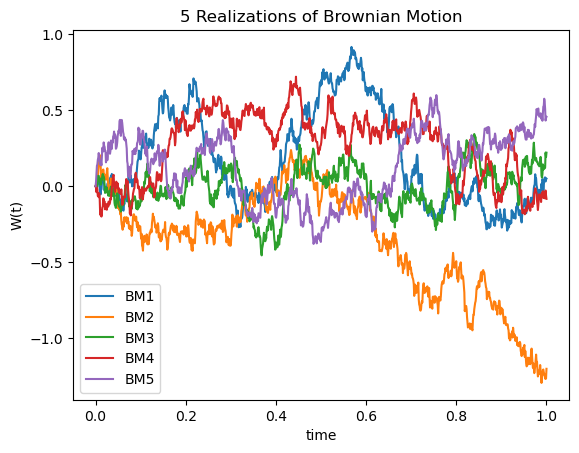

In [289]:
BrownianMotionPlot()

**3.b)**

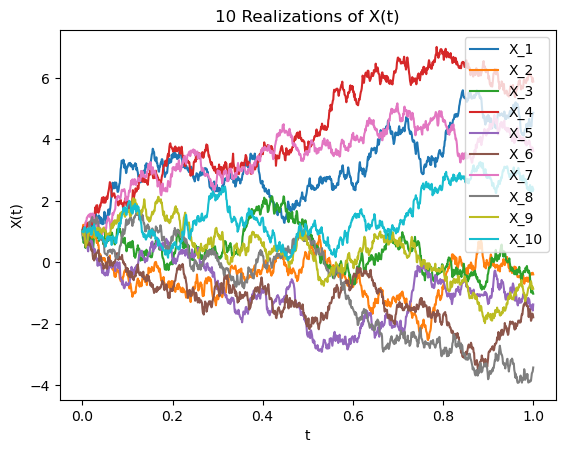

In [292]:
# (i) Plot 10 sample paths of X using distretization for N=10^3
def X_compute(N):
    X = np.zeros(N)
    time_steps = np.linspace(0, 1, N)
    BM = BrownianMotion(1,N)
    for j in range(N):
        X[j] = 1 + time_steps[j] + 3*BM[j]
    return X

X = np.zeros(1000)
for i in range(10):
    X = X_compute(1000)
    plt.plot(time_steps, X, label=f'X_{i+1}')
        
plt.xlabel('t')
plt.ylabel('X(t)')
plt.title('10 Realizations of X(t)')
plt.legend()
plt.show()
    

In [294]:
# (ii) MonteCarlo simulation using M = 10^5 samples
M = 10**5
#Expected value approximation
E_montecarlo_approx = 0
X_montecarlo = np.zeros(M)
for i in range(M):
    X_montecarlo[i] = np.exp(X_compute(2)[-1])
    E_montecarlo_approx += X_montecarlo[i]
E_montecarlo_approx /= M

# Variance approximation
V_montecarlo_approx = 0
for i in range(M):
    V_montecarlo_approx += (X_montecarlo[i] - E_montecarlo_approx) ** 2
V_montecarlo_approx /= (M-1)

# Confidence interval
alpha = 0.95
aux = np.sqrt(V_montecarlo_approx/((1-alpha)*M))
ci_inf = E_montecarlo_approx - aux
ci_sup = E_montecarlo_approx + aux

print(f'E[X_1] Montecarlo approximation: {E_montecarlo_approx}')
print(f'Confidence interval: [{ci_inf}, {ci_sup}]')

E[X_1] Montecarlo approximation: 546.2846473632551
Confidence interval: [387.20777638236297, 705.3615183441473]


The actual value 665.14 lies inside the confidence interval. We can appreciate the wide CI interval that we have obtained due to the fact that the variance of X1 is really high. This result makes sense, as we are inserting brownian motion in the exponential function, so the paths derive from eachother in a significant way. 